In [16]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('../data/df_cleaned.csv',sep=";")

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_7224\1833347467.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/df_cleaned.csv',sep=";")


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39439 entries, 0 to 39438
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               39439 non-null  int64  
 1   type_annonceur           39439 non-null  object 
 2   typedebien               39439 non-null  object 
 3   typedetransaction        39439 non-null  object 
 4   etage                    39439 non-null  int64  
 5   surface                  39439 non-null  int64  
 6   nb_pieces                39439 non-null  int64  
 7   prix_bien                39439 non-null  int64  
 8   mensualiteFinance        39439 non-null  int64  
 9   balcon                   39439 non-null  int64  
 10  eau                      39439 non-null  int64  
 11  bain                     39439 non-null  int64  
 12  dpeL                     39439 non-null  object 
 13  dpeC                     39439 non-null  object 
 14  mapCoordonneesLatitude

In [19]:
df = df.drop('Unnamed: 0',axis=1)

In [20]:
df.shape

(39439, 34)

In [21]:
var_num = df.select_dtypes(include=['int64', 'float64'])
var_cat = df.select_dtypes(include=['object','category'])

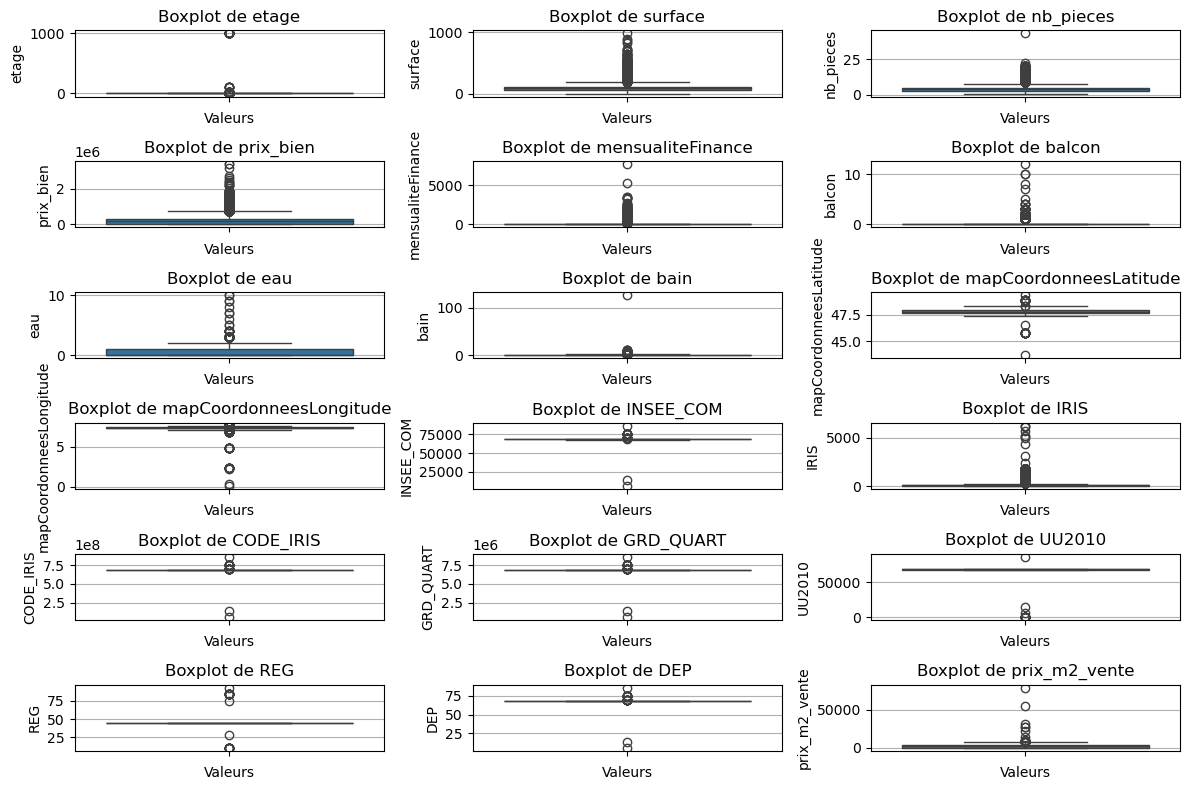

In [27]:
# Boxplot des variables
fig, axes = plt.subplots(6, 3, figsize=(12, 8))

for ax, column in zip(axes.flatten(), var_num.columns):
    sns.boxplot(y=var_num[column], ax=ax) 
    ax.set_title(f"Boxplot de {column}")
    ax.set_xlabel("Valeurs")
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [28]:
var_num.shape

(39439, 18)

In [29]:
import pandas as pd
import numpy as np

def remove_outliers(df, features, factor=1.5):
    """
    Cap les outliers par la méthode IQR (winsorisation)
    """
    df_capped = df.copy()

    for feature in features:
        Q1 = df_capped[feature].quantile(0.25)
        Q3 = df_capped[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - factor * IQR
        upper = Q3 + factor * IQR

        df_capped[feature] = df_capped[feature].clip(lower, upper)

    return df_capped

In [30]:
var_num_cleand = remove_outliers(var_num, var_num.columns)

---
Encoding
---